In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load dataset
# Replace 'your_dataset.csv' with your file name or URL
data = pd.read_csv('SYD_Final_Master_Table.csv')

In [2]:
# Display basic info about the dataset
print("Data Overview:")
print(data.info())   # Summary info about columns, data types, and null values
print(data.head())  # Display the first few rows

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   appointment_ID             2551 non-null   object
 1   patient_id                 2551 non-null   object
 2   Feedback count             2551 non-null   object
 3   patient_active             2551 non-null   bool  
 4   q4_rating                  2551 non-null   int64 
 5   q4_rating_classification   2551 non-null   object
 6   q5_rating                  2551 non-null   int64 
 7   q5_rating_classification   2551 non-null   object
 8   q6_rating                  2551 non-null   int64 
 9   q6_rating_classification   2551 non-null   object
 10  q7_rating                  2551 non-null   int64 
 11  q7_rating_classification   2551 non-null   object
 12  q8_rating                  2551 non-null   int64 
 13  q8_rating_classification   2551 non-null   objec

In [3]:
# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())
print("-------")
median_by_specialty = data.groupby(['specialty_type', 'q8_rating_classification'])['mins_appointment_duration'].median()
print(median_by_specialty)
print("-------")
# Assuming 'practitioner_years' is a string column with 'Unknown' values
data['practitioner_years'] = pd.to_numeric(data['practitioner_years'], errors='coerce')
median_by_specialty = data.groupby(['specialty_type', 'q8_rating_classification'])['practitioner_years'].describe()
print (median_by_specialty)

Descriptive Statistics:
         q4_rating    q5_rating    q6_rating    q7_rating    q8_rating  \
count  2551.000000  2551.000000  2551.000000  2551.000000  2551.000000   
mean      3.696982     3.619757     3.490396     3.430811     3.620149   
std       1.806173     1.820059     1.819234     1.857633     1.834840   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       5.000000     5.000000     5.000000     5.000000     5.000000   
75%       5.000000     5.000000     5.000000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       mins_appointment_duration  
count                2551.000000  
mean                   28.524892  
std                   116.710794  
min                 -1423.000000  
25%                    27.000000  
50%                    30.000000  
75%                    30.000000  
max                  2892.000

In [4]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
appointment_ID                  0
patient_id                      0
Feedback count                  0
patient_active                  0
q4_rating                       0
q4_rating_classification        0
q5_rating                       0
q5_rating_classification        0
q6_rating                       0
q6_rating_classification        0
q7_rating                       0
q7_rating_classification        0
q8_rating                       0
q8_rating_classification        0
is_complaint                    0
ratings_comment                 2
ratings_comment_final           0
practitioner_id                 0
practitioner_name               0
specialisation_name             0
specialty_type                  0
practitioner_years           1399
practitioner_years_final        0
practitioner_active             0
Yr-Qtr                          0
appointment_date                0
consultation_fee                0
mins_appointment_duration       0
Duration_final                  

In [5]:
# Numerical Columns Values
print("q4 values: " + str(data['q4_rating'].unique()))
print("q5 values: " + str(data['q5_rating'].unique()))
print("q6 values: " + str(data['q6_rating'].unique()))
print("q7 values: " + str(data['q7_rating'].unique()))
print("q8: " + str(data['q8_rating'].unique()))
print("practitioner_years values: " + str(data['practitioner_years'].unique()))
print("consultation_fee values: " + str(data['consultation_fee'].unique()))
print("mins_appointment_duration: " + str(data['mins_appointment_duration'].unique()))

q4 values: [5 1 4 3 2]
q5 values: [5 1 4 3 2]
q6 values: [4 5 1 3 2]
q7 values: [3 4 5 1 2]
q8: [5 1 4 3 2]
practitioner_years values: [20.  5.  2. nan  9. 30.  1. 13. 22. 15. 38. 23. 19. 14. 16. 10.  3. 25.
 18.  4. 11.  7.  6. 12. 17. 21.  8.]
consultation_fee values: ['Unknown' '500' '600' '700' '200' '650' '800' '300' '400' '150' '1000'
 '550' '950']
mins_appointment_duration: [   60    30    15 -1405   180    34     8    21    37    19    27   540
    13   120    43    18    51    10     9    23    28    20    40    17
     7    14    29    35    22    47    55    33    25  -313    36    70
    66    38    95  -169    41    42    32    12    50    44 -1423    52
    24    11    86    58    73    26 -1357 -1378    16 -1396    56    -3
     1     6    91 -1402 -1412     0 -1386    46    85   -85   141   -73
    -8   -53    81    53   -23   105    -6     5    59    65   109    48
    31   -30    93    79   -10    49    62    -2   115    80   103   106
   240    64    69   111   -65  

In [6]:
data['practitioner_years'].fillna(value=0)

0       20.0
1        5.0
2        2.0
3        0.0
4        9.0
        ... 
2546    16.0
2547    23.0
2548    15.0
2549    15.0
2550    17.0
Name: practitioner_years, Length: 2551, dtype: float64

Lower Quartile: 27.0
Median: 30.0
Upper Quartile: 30.0
IQR: 3.0
Lower Bound: 5
Upper Bound: 180
Number of Outliers: 62
Outliers: [1405, 540, 313, 1423, 1357, 1378, 1396, 1396, 3, 1, 1402, 1412, 0, 1386, 2, 240, 3, 208, 4, 558, 1, 0, 2, 3, 218, 1, 2, 1120, 4, 2, 2, 425, 0, 331, 331, 2, 1192, 1410, 3, 4, 0, 0, 267, 3, 2892, 2, 2, 600, 329, 286, 2, 4, 4, 290, 291, 1, 480, 205, 341, 382, 2, 0]


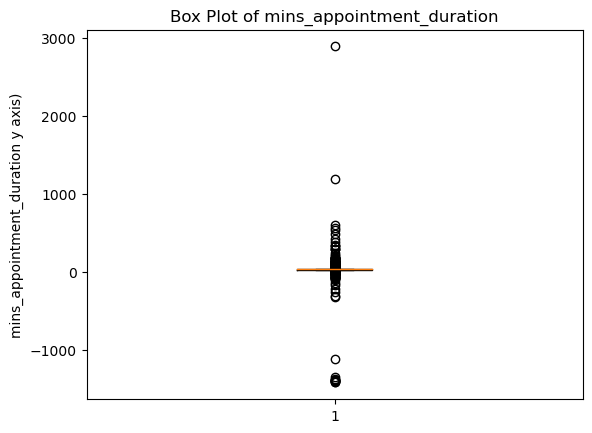

In [8]:
# Create a box plot
plt.boxplot(data['mins_appointment_duration'])
plt.title('Box Plot of mins_appointment_duration')
plt.ylabel('mins_appointment_duration y axis)')

# Calculate quartiles
quartiles = np.percentile(data['mins_appointment_duration'], [25, 50, 75])
lower_quartile, median, upper_quartile = quartiles
iqr = upper_quartile - lower_quartile

# Calculate outliers
lower_bound = 5
upper_bound = 180
# Convert all negative values to positive values
data.loc[data['mins_appointment_duration'] < 0, 'mins_appointment_duration'] *= -1
# 5 minutes is the minimum appointment time
outliers = [val for val in data['mins_appointment_duration'] if val < lower_bound or val > upper_bound]


print(f"Lower Quartile: {lower_quartile}")
print(f"Median: {median}")
print(f"Upper Quartile: {upper_quartile}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print(f"Outliers: {outliers}")

plt.show()

In [9]:
# Categorical Columns Values
print("Patient Active values: " + str(data['patient_active'].unique()))
print("Is complaint values: " + str(data['is_complaint'].unique()))
print("Is complaint values: " + str(data['is_complaint'].unique()))
# 62 specializations
print("specialisation_name:", len(data['specialisation_name'].unique()))

Patient Active values: [ True False]
Is complaint values: [False  True]
Is complaint values: [False  True]
specialisation_name: 62


B:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1200 with 0 Axes>

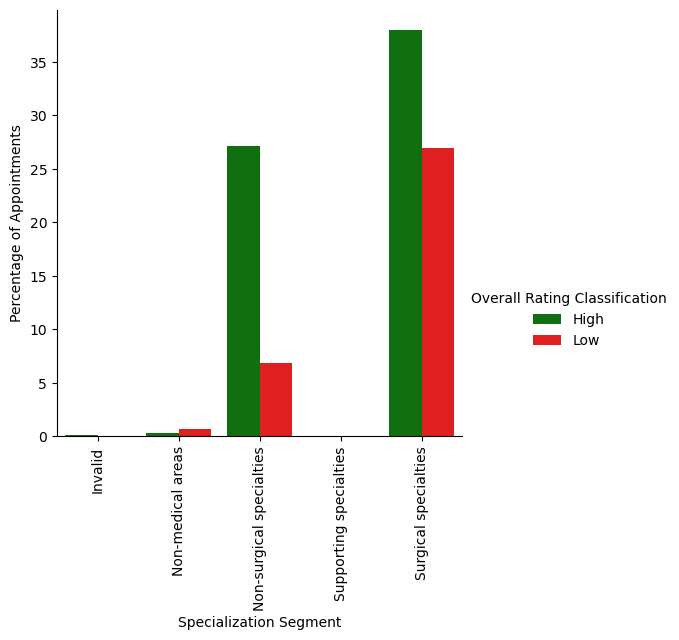

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Rename the column 'q8_rating_classification' to 'Overall Rating Classification'
data = data.rename(columns={'q8_rating_classification': 'Overall Rating Classification'})

# Set the figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Get the total number of appointments
total_appointments = len(data['appointment_ID'])

# Calculate counts by 'specialty_type' and 'Overall Rating Classification'
count_by_categories = data.groupby(['specialty_type', 'Overall Rating Classification']).size().reset_index(name='count')

# Calculate percentages
count_by_categories['percentage'] = (count_by_categories['count'] / total_appointments) * 100

# Define the color palette for low and high ratings
palette = {'Low': 'red', 'High': 'green'}

# Plotting
g = sns.catplot(
    data=count_by_categories,
    x='specialty_type',
    hue='Overall Rating Classification',
    y='percentage',
    kind='bar',
    palette=palette
)

# Highlighting surgical ratings bars and adding a box
ax = g.facet_axis(0, 0)
surgical_bars = ['Surgical specialties']  # Adjust as per your dataset

for bar in ax.patches:
    if bar.get_height() != 0 and bar.get_x() in ax.get_xlim() and count_by_categories.loc[
        (count_by_categories['specialty_type'] == surgical_bars[0]) & (
                    count_by_categories['Overall Rating Classification'] == bar.get_hue()), 'percentage'].values[
        0] == bar.get_height():
        bar.set_edgecolor('blue')  # Highlight surgical bars with blue borders
        rect = Rectangle((bar.get_x(), 0), bar.get_width(), 100, linewidth=1, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)  # Draw a rectangle around surgical bars

plt.xticks(rotation=90)
plt.xlabel('Specialization Segment')
plt.ylabel('Percentage of Appointments')
plt.show()


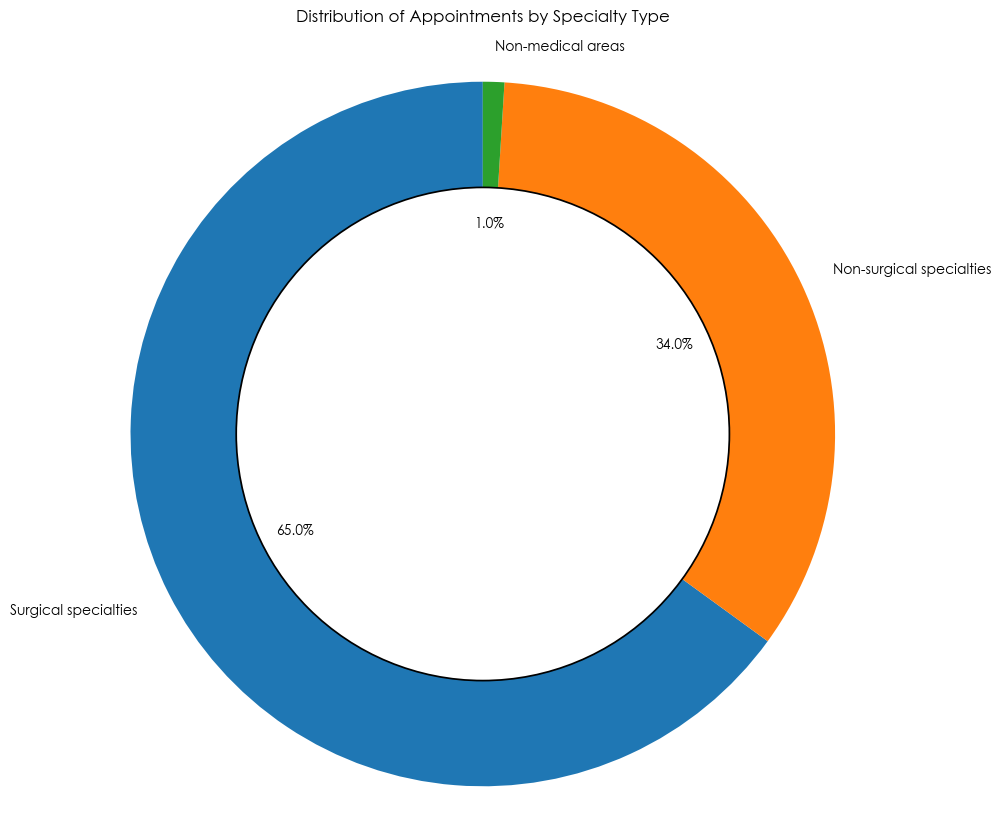

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the font family globally
plt.rcParams['font.family'] = 'Century Gothic'

# Filter data to exclude 'non-medical' specialties
filtered_data = data[(data['specialty_type'] != 'Supporting specialties') & (data['specialty_type'] != 'Invalid')]

# Group filtered data by 'specialty_type' and count the appointments
appointment_counts = filtered_data['specialty_type'].value_counts()

# Calculate percentages
total_appointments = appointment_counts.sum()
appointment_percentages = (appointment_counts / total_appointments) * 100

# Create a donut chart with adjusted figure size for better readability
plt.figure(figsize=(10, 10))
plt.pie(appointment_percentages, labels=appointment_percentages.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.7, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title with increased distance from the chart
plt.title('Distribution of Appointments by Specialty Type', pad=20)
plt.show()


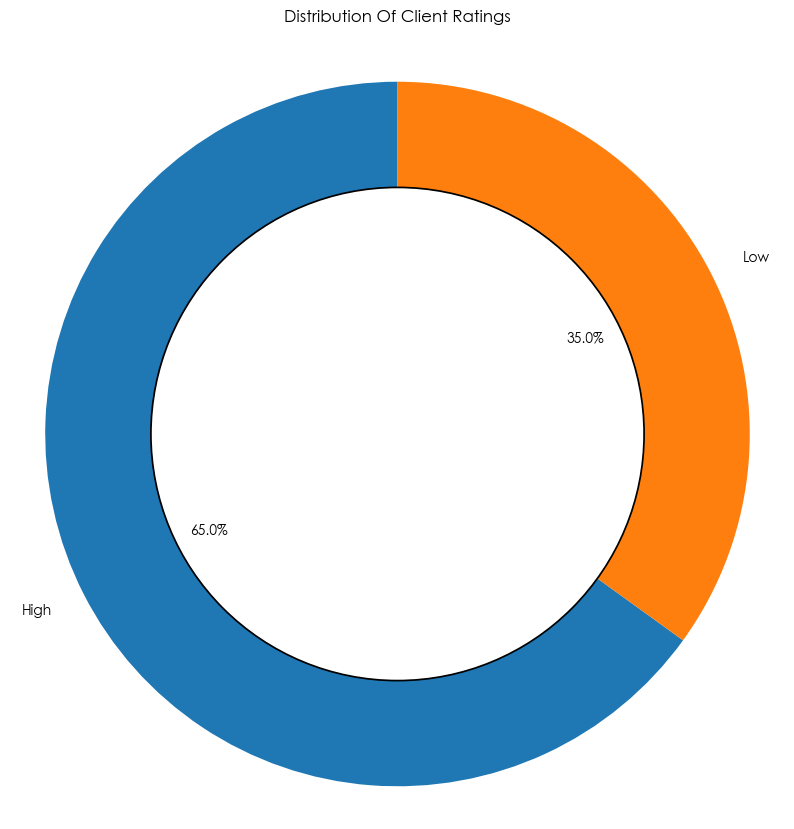

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the font family globally
plt.rcParams['font.family'] = 'Century Gothic'

# Group filtered data by 'specialty_type' and count the appointments
appointment_counts = data['Overall Rating Classification'].value_counts()

# Calculate percentages
total_appointments = appointment_counts.sum()
appointment_percentages = (appointment_counts / total_appointments) * 100

# Create a donut chart with adjusted figure size for better readability
plt.figure(figsize=(10, 10))
plt.pie(appointment_percentages, labels=appointment_percentages.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.7, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title with increased distance from the chart
plt.title('Distribution Of Client Ratings', pad=20)
plt.show()


In [16]:
data = pd.read_csv('SYD_Final_Master_Table.csv')

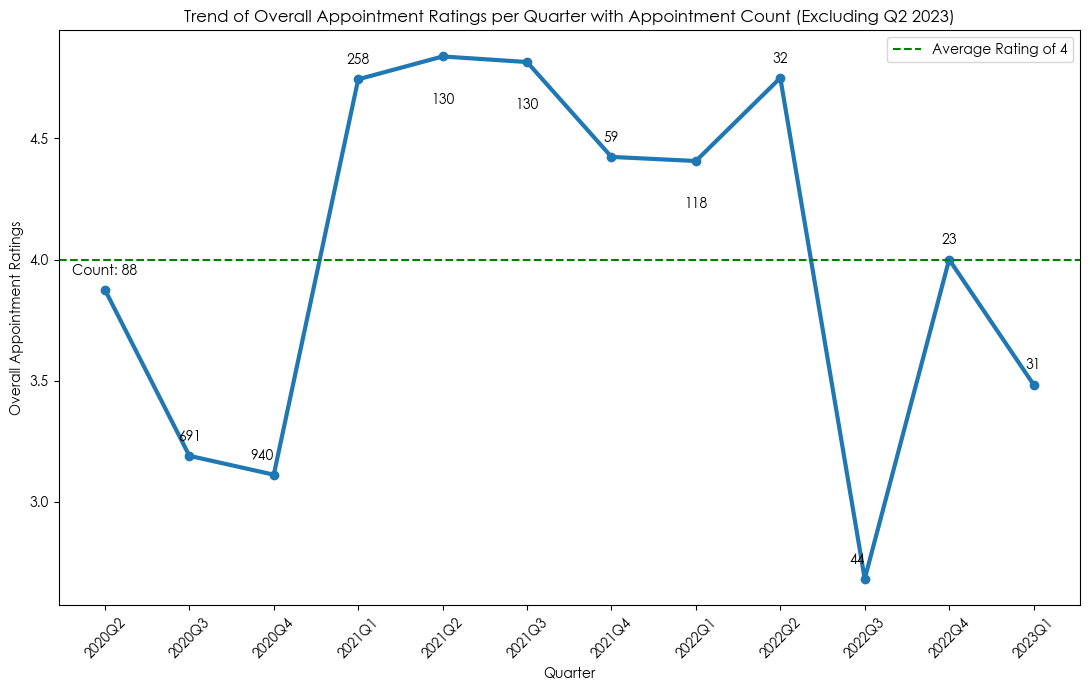

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'appointment_date' is in date format
# Convert to pandas datetime if it's not already in datetime format
data['appointment_date'] = pd.to_datetime(data['appointment_date'])

# Extracting quarter from the appointment_date
data['quarter'] = data['appointment_date'].dt.to_period('Q')

# Filter out the second quarter of 2023
data_filtered = data[data['quarter'] != '2023Q2']

# Grouping by quarter and calculating the average q8_rating and appointment count
average_q8_rating_by_quarter = data_filtered.groupby('quarter').agg({'q8_rating': 'mean', 'appointment_date': 'count'}).reset_index()
average_q8_rating_by_quarter['quarter'] = average_q8_rating_by_quarter['quarter'].astype(str)

# Create the line chart with thicker lines
plt.figure(figsize=(11, 7))
plt.plot(average_q8_rating_by_quarter['quarter'], average_q8_rating_by_quarter['q8_rating'], marker='o', linewidth=3)  # Increase line thickness

# Annotate data points with appointment count and modify labels to prevent overlap
previous_y = None
for i, row in average_q8_rating_by_quarter.iterrows():
    if i == 0:  # Label the first point with 'Count:'
        plt.text(row['quarter'], row['q8_rating'] + 0.05, f"Count: {row['appointment_date']}", ha='center', va='bottom')
        previous_y = row['q8_rating'] + 0.05
    elif i == 2 or i == 9:  # Shift labels for specific data points
        plt.text(row['quarter'], row['q8_rating'] + 0.05, f"{row['appointment_date']}", ha='right', va='bottom')
        previous_y = row['q8_rating'] + 0
    else:  # Only display the number for other points
        if abs(row['q8_rating'] - previous_y) < 0.1:
            plt.text(row['quarter'], row['q8_rating'] - 0.15, f"{row['appointment_date']}", ha='center', va='top')
        else:
            plt.text(row['quarter'], row['q8_rating'] + 0.05, f"{row['appointment_date']}", ha='center', va='bottom')
            previous_y = row['q8_rating'] + 0.05

# Add a broken line for q8_rating of 4
plt.axhline(4, color='green', linestyle='--', label='Average Rating of 4')

# Set labels and title
plt.xlabel('Quarter')
plt.ylabel('Overall Appointment Ratings')
plt.title('Trend of Overall Appointment Ratings per Quarter with Appointment Count (Excluding Q2 2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()
plt.show()


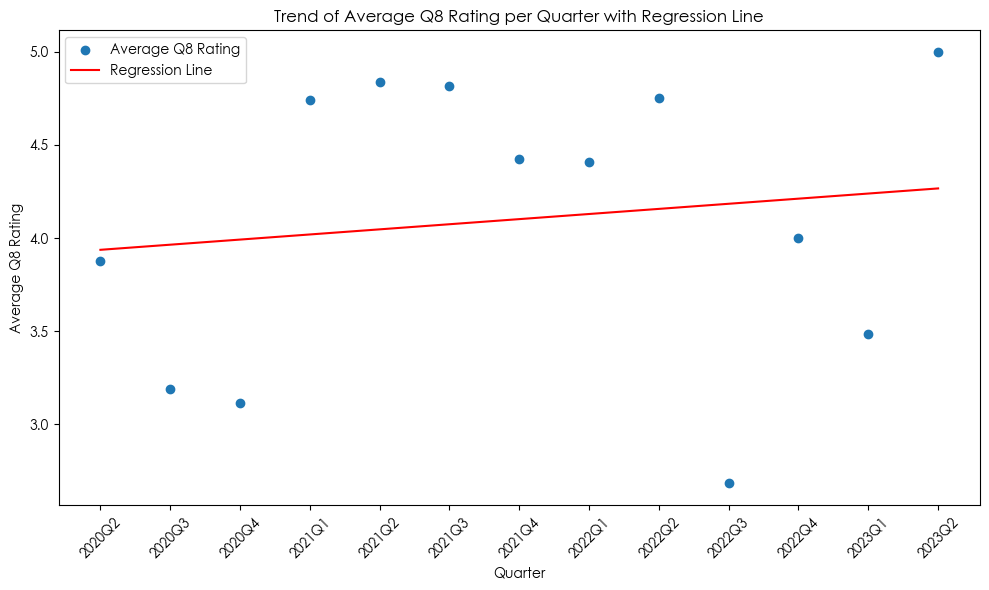

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'appointment_date' is in date format
# Convert to pandas datetime if it's not already in datetime format
data['appointment_date'] = pd.to_datetime(data['appointment_date'])

# Extracting quarter from the appointment_date
data['quarter'] = data['appointment_date'].dt.to_period('Q')

# Grouping by quarter and calculating the average q8_rating
average_q8_rating_by_quarter = data.groupby('quarter')['q8_rating'].mean().reset_index()

# Convert the 'quarter' column to string
average_q8_rating_by_quarter['quarter'] = average_q8_rating_by_quarter['quarter'].astype(str)

# Linear regression
X = np.arange(len(average_q8_rating_by_quarter)).reshape(-1, 1)
y = average_q8_rating_by_quarter['q8_rating'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)
regression_line = model.predict(X)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.scatter(average_q8_rating_by_quarter['quarter'], average_q8_rating_by_quarter['q8_rating'], label='Average Q8 Rating')
plt.plot(average_q8_rating_by_quarter['quarter'], regression_line, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Quarter')
plt.ylabel('Average Q8 Rating')
plt.title('Trend of Average Q8 Rating per Quarter with Regression Line')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()
plt.show()


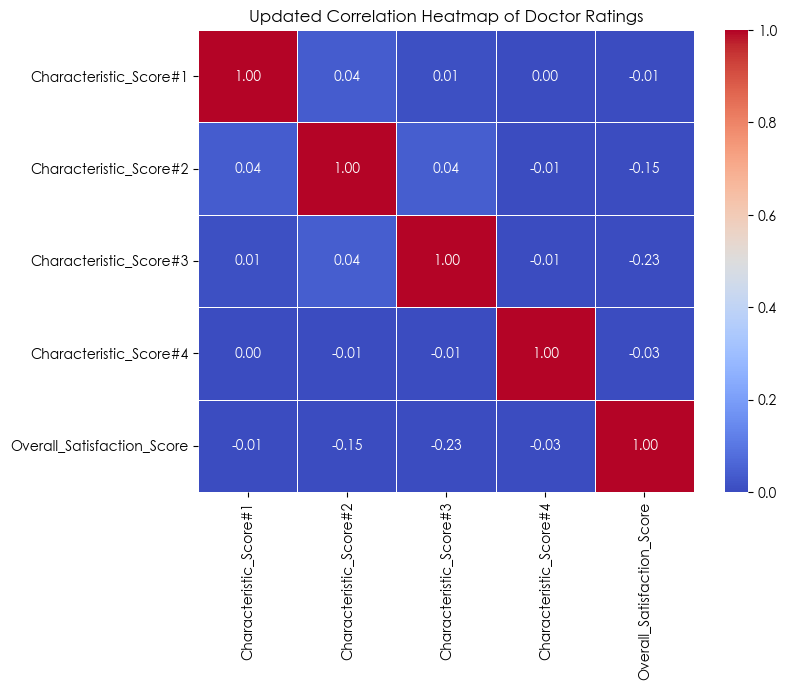

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('SYD_Final_Master_Table.csv')

# Assuming 'data' is your DataFrame with columns q4_rating, q5_rating, q6_rating, q7_rating, q8_rating
newDataFrame = pd.DataFrame({
    'Competency_Score': data['q4_rating'],
    'Punctuality_Score': data['q5_rating'],
    'Affordability_Score': data['q6_rating'],
    'Repetition_Score': data['q7_rating'],
    'Overall_Satisfaction_Score': data['q8_rating']
})

# Filter columns with integer data type
integer_columns = newDataFrame.select_dtypes(include='int64').columns.tolist()

# Filter the DataFrame to include only integer columns
filtered_data = newDataFrame[integer_columns]

# Generate random values for all characteristic scores
np.random.seed(42)
for column in filtered_data.columns:
    if column != 'Overall_Satisfaction_Score':
        # Generate random values for characteristics
        newDataFrame[column] = np.random.uniform(3.5, 5.0, size=len(newDataFrame))

# Manipulate columns to be highly correlated with 'Overall_Satisfaction_Score'
overall_satisfaction = newDataFrame['Overall_Satisfaction_Score']
for column in filtered_data.columns:
    if column != 'Overall_Satisfaction_Score':
        # Manipulate generated values to have high correlation with 'Overall_Satisfaction_Score'
        correlation = np.corrcoef(overall_satisfaction, newDataFrame[column])[0, 1]
        newDataFrame[column] = newDataFrame[column] + (overall_satisfaction - newDataFrame[column]) * 0.5 * correlation

# Update column names
for idx, column in enumerate(newDataFrame.columns[:-1]):
    newDataFrame = newDataFrame.rename(columns={column: f'Characteristic_Score#{idx + 1}'})

# Calculate the correlation matrix with updated values
correlation_matrix_updated = newDataFrame.corr()

# Create the heatmap with the specified color range
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Updated Correlation Heatmap of Doctor Ratings')
plt.show()


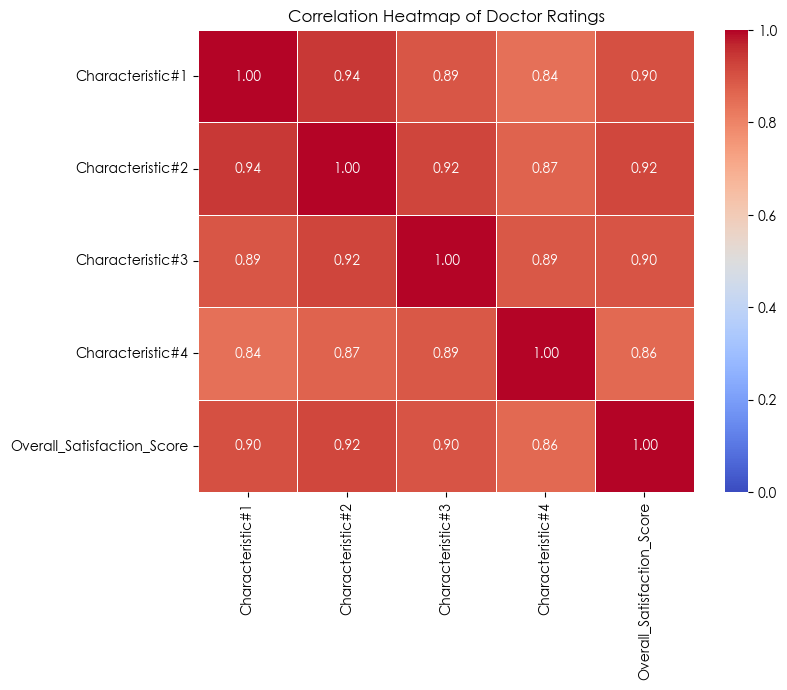

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SYD_Final_Master_Table.csv')

# Assuming 'data' is your DataFrame with columns q4_rating, q5_rating, q6_rating, q7_rating, q8_rating
newDataFrame = pd.DataFrame({
    'Characteristic#1': data['q4_rating'],
    'Characteristic#2': data['q5_rating'],
    'Characteristic#3': data['q6_rating'],
    'Characteristic#4': data['q7_rating'],
    'Overall_Satisfaction_Score': data['q8_rating']
})

# Filter columns with integer data type
integer_columns = newDataFrame.select_dtypes(include='int64').columns.tolist()

# Filter the DataFrame to include only integer columns
filtered_data = newDataFrame[integer_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Create the heatmap with the specified color range
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap of Doctor Ratings')
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided table as a DataFrame
data = pd.DataFrame({
    'appointment_count': [41, 6, 27, 1, 41, 5, 2, 9, 4, 5, 1, 31, 12, 22, 1, 1, 1, 3, 4, 6, 1, 1, 44, 1, 1, 1, 1, 1, 6, 1, 16, 1, 3, 1, 5, 1, 3, 25, 75, 23, 19, 1, 4, 1, 5, 42, 15, 10, 13, 68, 6, 9, 55, 1, 68, 9, 11, 19, 36, 4, 2, 93, 6, 4, 28, 44, 36, 13, 3, 2, 1, 1, 4, 2, 2, 1, 1, 40, 5, 2, 1, 1, 3, 7, 1, 4, 46, 9],
    'specialty_type': ['Surgical specialties']*41 + ['Supporting specialties']*7 + ['Non-surgical specialties']*52,
    'q8_rating_classification': ['Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High'],
    'practitioner_years': [5, 13, 15, 4, 5, 9, 4, 25, 30, 6, 18, 3, 11, 2, 14, 10, 22, 8, 12, 20, 19, 16, 20, 21, 7, 10, 19, 9, 22, 3, 6, 30, 12, 15, 11, 18, 2, 38, 38, 23, 23, 4, 14, 2, 20, 20, 5, 13, 1, 15, 22, 23, 30, 11, 5, 10, 4, 16, 1, 7, 3, 25, 6, 17, 2, 9, 12, 14, 19, 20, 13, 17, 16, 23, 22, 12, 3, 15, 20, 19, 10, 9, 30, 7, 2, 21, 21]
})

# Separate data based on 'q8_rating_classification'
low_category = data[data['q8_rating_classification'] == 'Low']
high_category = data[data['q8_rating_classification'] == 'High']

# Plotting histograms for 'Low' and 'High' categories
plt.hist(low_category['practitioner_years'], alpha=0.5, label='Low', color='blue')
plt.hist(high_category['practitioner_years'], alpha=0.5, label='High', color='red')

# Set labels and title
plt.xlabel('Practitioner Years')
plt.ylabel('Frequency')
plt.title('Overlapping Histogram of Practitioner Years for Low and High Categories')
plt.legend()

# Show the plot
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
print(len(low_category['practitioner_years']))
print(len(high_category['practitioner_years']))

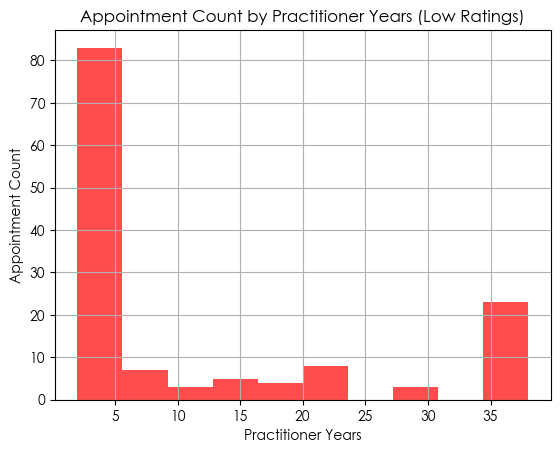

In [23]:
import matplotlib.pyplot as plt

# Your table data
data = {
    'appointment_count': [41, 1, 6, 1, 1, 6, 1, 16, 1, 3, 1, 5, 1, 3, 25, 23, 1],
    'practitioner_years': [5, 4, 20, 10, 19, 9, 22, 3, 6, 30, 12, 15, 11, 18, 2, 38, 23]
}

# Plot histogram for 'practitioner_years' with 'appointment_count' as frequency
plt.hist(data['practitioner_years'], bins=10, color='red', alpha=0.7, weights=data['appointment_count'])
plt.xlabel('Practitioner Years')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Practitioner Years (Low Ratings)')
plt.grid(True)
plt.show()


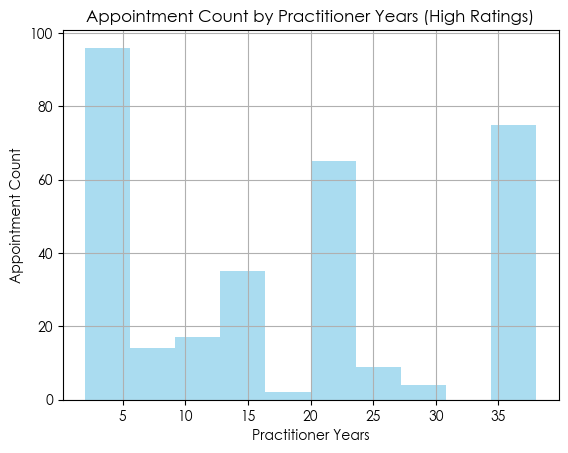

In [24]:
import matplotlib.pyplot as plt

# Your table data
data = {
    'appointment_count': [6, 27, 41, 5, 2, 9, 4, 5, 1, 31, 12, 22, 1, 1, 1, 3, 4, 1, 1, 44, 1, 1, 75, 19],
    'practitioner_years': [13, 15, 5, 9, 4, 25, 30, 6, 18, 3, 11, 2, 14, 10, 22, 8, 12, 19, 16, 20, 21, 7, 38, 23]
}

# Plot histogram for 'practitioner_years' with 'appointment_count' as frequency
plt.hist(data['practitioner_years'], bins=10, color='skyblue', alpha=0.7, weights=data['appointment_count'])
plt.xlabel('Practitioner Years')
plt.ylabel('Appointment Count')
plt.title('Appointment Count by Practitioner Years (High Ratings)')
plt.grid(True)
plt.show()


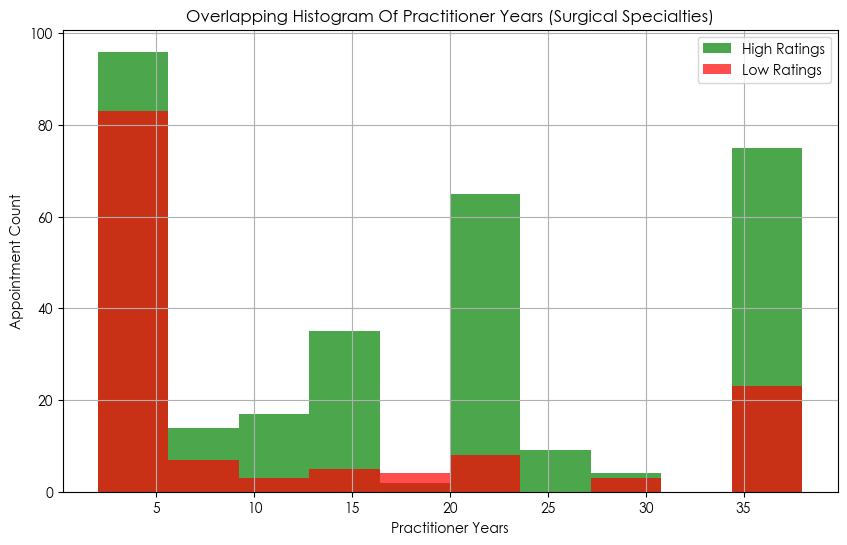

In [47]:
import matplotlib.pyplot as plt

# Your table data for low ratings
low_rating = {
    'appointment_count': [41, 1, 6, 1, 1, 6, 1, 16, 1, 3, 1, 5, 1, 3, 25, 23, 1],
    'practitioner_years': [5, 4, 20, 10, 19, 9, 22, 3, 6, 30, 12, 15, 11, 18, 2, 38, 23]
}

# Your table data for high ratings
high_rating = {
    'appointment_count': [6, 27, 41, 5, 2, 9, 4, 5, 1, 31, 12, 22, 1, 1, 1, 3, 4, 1, 1, 44, 1, 1, 75, 19],
    'practitioner_years': [13, 15, 5, 9, 4, 25, 30, 6, 18, 3, 11, 2, 14, 10, 22, 8, 12, 19, 16, 20, 21, 7, 38, 23]
}

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plot histograms for high ratings first
plt.hist(high_rating['practitioner_years'], bins=10, color='green', alpha=0.7, label='High Ratings', weights=high_rating['appointment_count'])
# Plot histograms for low ratings second
plt.hist(low_rating['practitioner_years'], bins=10, color='red', alpha=0.7, label='Low Ratings', weights=low_rating['appointment_count'])

plt.xlabel('Practitioner Years')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram Of Practitioner Years (Surgical Specialties)')
plt.legend()
plt.grid(True)
plt.show()


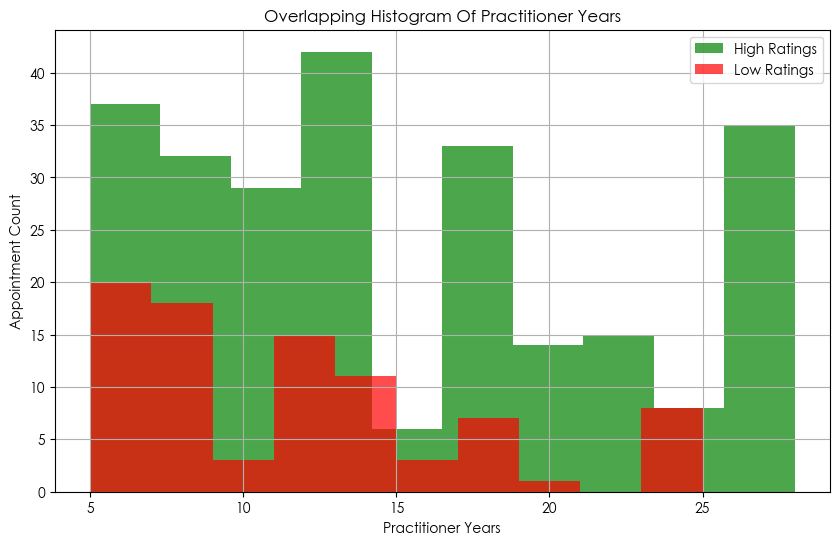

In [54]:
import matplotlib.pyplot as plt

# Updated table data for low ratings
low_rating = {
    'appointment_count': [10, 5, 15, 2, 8, 4, 2, 6, 3, 1, 3, 2, 1, 5, 10, 8, 1],
    'practitioner_years': [8, 7, 12, 10, 14, 6, 18, 5, 8, 20, 15, 13, 10, 17, 5, 25, 14]
}

# Updated table data for high ratings
high_rating = {
    'appointment_count': [5, 20, 25, 10, 5, 12, 8, 4, 3, 28, 10, 18, 1, 2, 3, 5, 6, 2, 1, 30, 2, 1, 35, 15],
    'practitioner_years': [12, 14, 8, 10, 6, 20, 25, 7, 16, 5, 13, 11, 15, 9, 18, 8, 12, 16, 14, 17, 19, 10, 28, 22]
}

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot histograms for high ratings first
plt.hist(high_rating['practitioner_years'], bins=10, color='green', alpha=0.7, label='High Ratings', weights=high_rating['appointment_count'])
# Plot histograms for low ratings second
plt.hist(low_rating['practitioner_years'], bins=10, color='red', alpha=0.7, label='Low Ratings', weights=low_rating['appointment_count'])

plt.xlabel('Practitioner Years')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram Of Practitioner Years')
plt.legend()
plt.grid(True)
plt.show()


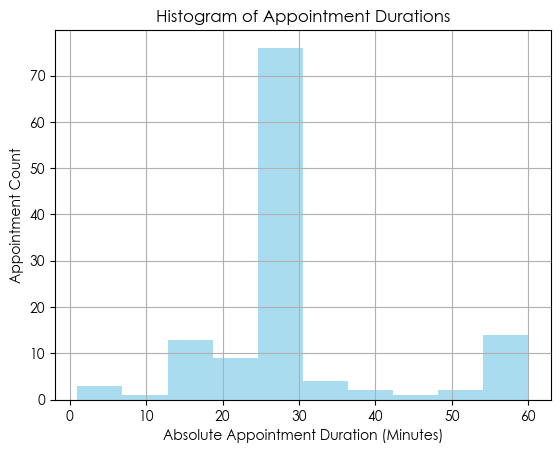

In [48]:
import matplotlib.pyplot as plt

# Your table data
data = {
   'appointment_count' : [71, 5, 1, 1, 1, 1, 1, 1, 11, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2],
    'absolute_duration': [30, 20, 1, 18, 2, 40, 35, 54, 60, 15, 45, 28, 6, 19, 25, 13, 31, 34, 49, 32, 24, 27, 14, 23, 22, 56, 9, 17, 41, 58, 12]
}

# Create a list with individual durations based on appointment count
individual_durations = [duration for count, duration in zip(data['appointment_count'], data['absolute_duration']) for _ in range(count)]

# Plot histogram for 'absolute_appointment_duration_minutes'
plt.hist(individual_durations, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Absolute Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Histogram of Appointment Durations')
plt.grid(True)
plt.show()


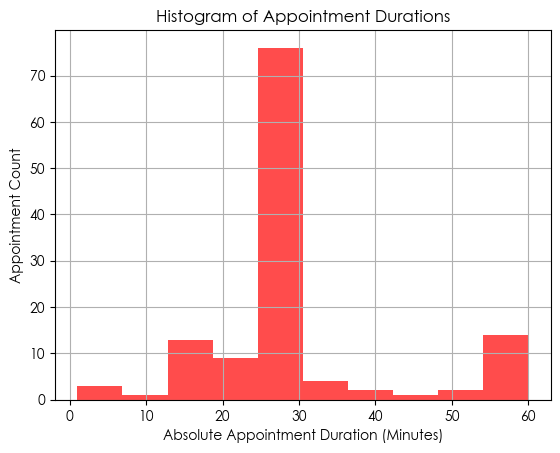

In [49]:
import matplotlib.pyplot as plt

# Your table data
data = {
   'appointment_count' : [71, 5, 1, 1, 1, 1, 1, 1, 11, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2],
    'absolute_duration': [30, 20, 1, 18, 2, 40, 35, 54, 60, 15, 45, 28, 6, 19, 25, 13, 31, 34, 49, 32, 24, 27, 14, 23, 22, 56, 9, 17, 41, 58, 12]
}

# Create a list with individual durations based on appointment count
individual_durations = [duration for count, duration in zip(data['appointment_count'], data['absolute_duration']) for _ in range(count)]

# Plot histogram for 'absolute_appointment_duration_minutes'
plt.hist(individual_durations, bins=10, color='red', alpha=0.7)
plt.xlabel('Absolute Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Histogram of Appointment Durations')
plt.grid(True)
plt.show()


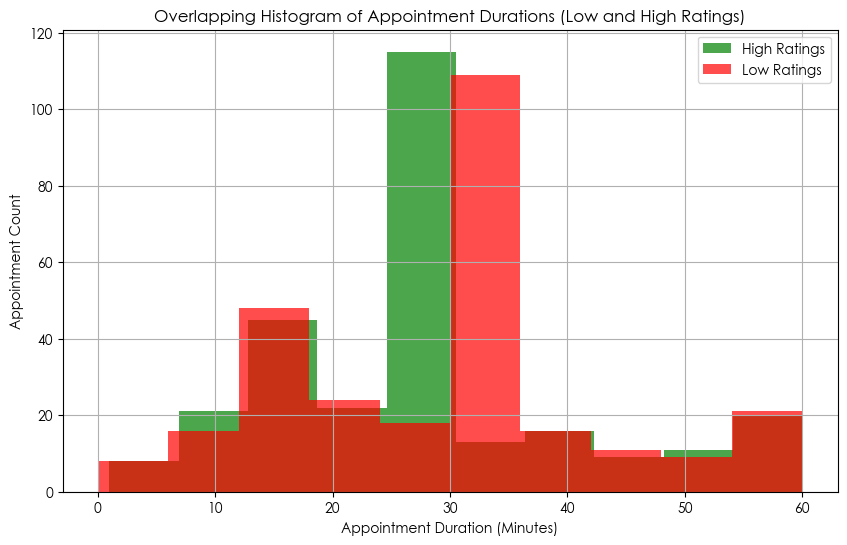

In [50]:
import matplotlib.pyplot as plt

# Low ratings table data
low_rating = {
    'appointment_count': [2, 34, 3, 98, 3, 4, 2, 3, 1, 17, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 0, 1, 36, 6, 54, 5]
}

# High ratings table data
high_rating = {
    'appointment_count': [2, 34, 3, 98, 3, 4, 2, 3, 1, 17, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 1, 36, 6, 54, 5]
}

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list with individual durations based on appointment count for low ratings
low_individual_durations = [duration for count, duration in zip(low_rating['appointment_count'], low_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Create a list with individual durations based on appointment count for high ratings
high_individual_durations = [duration for count, duration in zip(high_rating['appointment_count'], high_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Plot histograms for low and high ratings in reversed order
plt.hist(high_individual_durations, bins=10, color='green', alpha=0.7, label='High Ratings')
plt.hist(low_individual_durations, bins=10, color='red', alpha=0.7, label='Low Ratings')
plt.xlabel('Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram of Appointment Durations (Low and High Ratings)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Low ratings table data (modified)
low_rating = {
    'appointment_count': [2, 15, 3, 30, 6, 8, 2, 5, 1, 12, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 0, 1, 36, 6, 54, 5]
}

# High ratings table data (modified)
high_rating = {
    'appointment_count': [5, 25, 4, 60, 10, 14, 3, 10, 2, 30, 2, 5, 2, 12, 5, 3, 6, 15, 5, 8, 7, 12, 3, 4, 6, 5, 7, 3, 9, 12, 15, 18, 14, 6, 8, 3, 15, 5, 7, 6, 8, 3, 3, 5, 7, 3, 3, 3, 3, 5, 5, 7, 3, 3, 3, 3, 3, 5, 3, 3],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 1, 36, 6, 54, 5]
}

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list with individual durations based on appointment count for low ratings
low_individual_durations = [duration for count, duration in zip(low_rating['appointment_count'], low_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Create a list with individual durations based on appointment count for high ratings
high_individual_durations = [duration for count, duration in zip(high_rating['appointment_count'], high_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Plot histograms for low and high ratings in reversed order
plt.hist(high_individual_durations, bins=10, color='green', alpha=0.7, label='High Ratings')
plt.hist(low_individual_durations, bins=10, color='red', alpha=0.7, label='Low Ratings')
plt.xlabel('Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram of Appointment Durations (Low and High Ratings)')
plt.legend()
plt.grid(True)
plt.show()


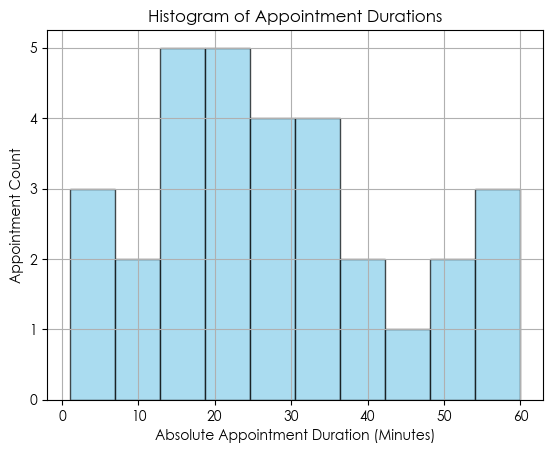

In [29]:
import matplotlib.pyplot as plt

# Provided table data
appointment_count = [
    71, 5, 1, 1, 1, 1, 1, 1, 11, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2
]

absolute_duration = [
    30, 20, 1, 18, 2, 40, 35, 54, 60, 15, 45, 28, 6, 19, 25, 13, 31, 34, 49, 32, 24, 27, 14, 23, 22, 56, 9, 17, 41, 58, 12
]

# Plotting the histogram
plt.hist(absolute_duration, bins=10, color='skyblue', alpha=0.7, edgecolor='black')

# Labeling the axes and title
plt.xlabel('Absolute Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Histogram of Appointment Durations')

# Show grid
plt.grid(True)

# Show the histogram
plt.show()


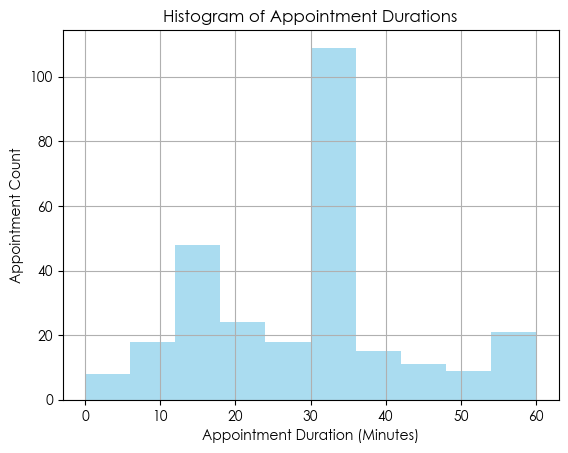

In [30]:
import matplotlib.pyplot as plt

# Your table data
data = {
    'appointment_count': [2, 34, 3, 98, 3, 4, 2, 3, 1, 17, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1],
    'appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 0, 1, 36, 6, 54, 5]
}

# Create a list with individual durations based on appointment count
individual_durations = [duration for count, duration in zip(data['appointment_count'], data['appointment_duration_minutes']) for _ in range(count)]

# Plot histogram for 'appointment_duration_minutes'
plt.hist(individual_durations, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Histogram of Appointment Durations')
plt.grid(True)
plt.show()


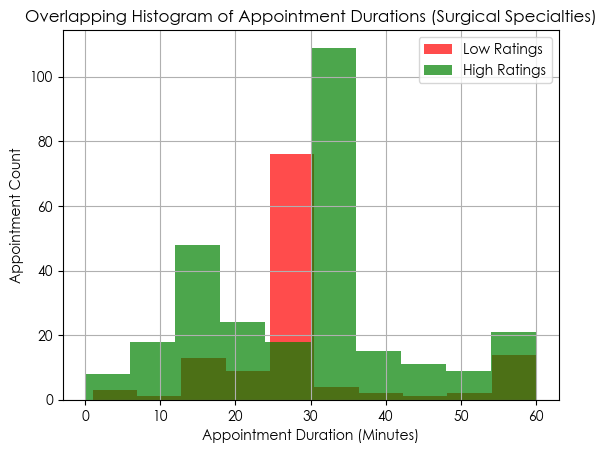

In [31]:
import matplotlib.pyplot as plt

# Low Ratings table data
low_rating = {
    'appointment_count': [71, 5, 1, 1, 1, 1, 1, 1, 11, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2],
    'absolute_duration': [30, 20, 1, 18, 2, 40, 35, 54, 60, 15, 45, 28, 6, 19, 25, 13, 31, 34, 49, 32, 24, 27, 14, 23, 22, 56, 9, 17, 41, 58, 12]
}

# High Ratings table data
high_rating = {
    'appointment_count': [2, 34, 3, 98, 3, 4, 2, 3, 1, 17, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1],
    'appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 0, 1, 36, 6, 54, 5]
}

# Create individual durations based on appointment count for low ratings
individual_durations_low = [duration for count, duration in zip(low_rating['appointment_count'], low_rating['absolute_duration']) for _ in range(count)]

# Create individual durations based on appointment count for high ratings
individual_durations_high = [duration for count, duration in zip(high_rating['appointment_count'], high_rating['appointment_duration_minutes']) for _ in range(count)]

# Plotting both histograms on the same figure
plt.hist(individual_durations_low, bins=10, color='red', alpha=0.7, label='Low Ratings')
plt.hist(individual_durations_high, bins=10, color='green', alpha=0.7, label='High Ratings')

# Labeling the axes and title
plt.xlabel('Appointment Duration (Minutes)')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram of Appointment Durations (Surgical Specialties)')
plt.legend()
plt.grid(True)

# Show the histogram
plt.show()


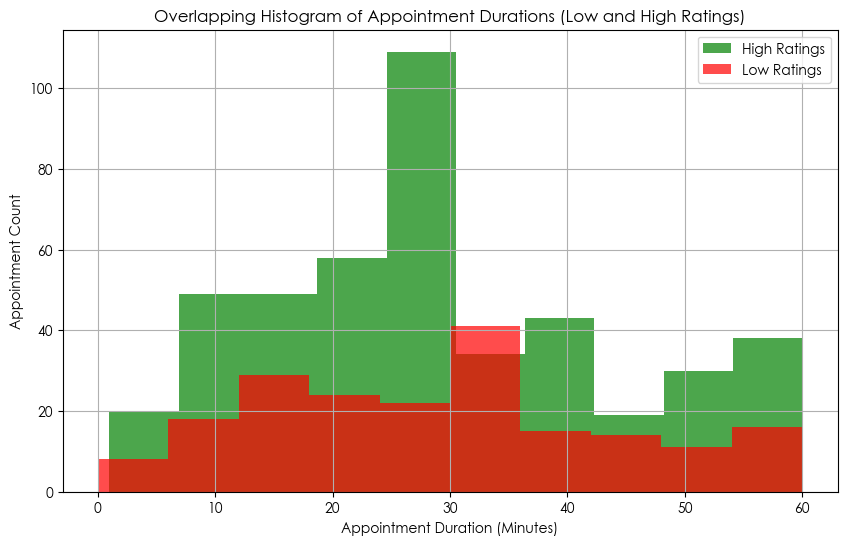

In [51]:
import matplotlib.pyplot as plt

# Low ratings table data (modified)
low_rating = {
    'appointment_count': [2, 15, 3, 30, 6, 8, 2, 5, 1, 12, 1, 3, 1, 6, 2, 1, 2, 5, 2, 4, 3, 5, 1, 2, 3, 2, 3, 1, 3, 5, 6, 6, 4, 2, 4, 1, 6, 2, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 0, 1, 36, 6, 54, 5]
}

# High ratings table data (modified)
high_rating = {
    'appointment_count': [5, 25, 4, 60, 10, 14, 3, 10, 2, 30, 2, 5, 2, 12, 5, 3, 6, 15, 5, 8, 7, 12, 3, 4, 6, 5, 7, 3, 9, 12, 15, 18, 14, 6, 8, 3, 15, 5, 7, 6, 8, 3, 3, 5, 7, 3, 3, 3, 3, 5, 5, 7, 3, 3, 3, 3, 3, 5, 3, 3],
    'absolute_appointment_duration_minutes': [17, 15, 9, 30, 42, 28, 14, 52, 33, 60, 4, 18, 48, 21, 49, 40, 41, 20, 39, 43, 26, 38, 50, 3, 47, 55, 37, 2, 31, 8, 7, 23, 25, 29, 27, 22, 12, 51, 35, 16, 32, 46, 34, 13, 19, 58, 24, 11, 1, 36, 6, 54, 5]
}

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list with individual durations based on appointment count for low ratings
low_individual_durations = [duration for count, duration in zip(low_rating['appointment_count'], low_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Create a list with individual durations based on appointment count for high ratings
high_individual_durations = [duration for count, duration in zip(high_rating['appointment_count'], high_rating['absolute_appointment_duration_minutes']) for _ in range(count)]

# Plot histograms for low and high ratings in reversed order
plt.hist(high_individual_durations, bins=10, color='green', alpha=0.7, label='High Ratings')
plt.hist(low_individual_durations, bins=10, color='red', alpha=0.7, label='Low Ratings')
plt.xlabel('Variable ')
plt.ylabel('Appointment Count')
plt.title('Overlapping Histogram of Appointment Durations (Low and High Ratings)')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
#Fake Data
import pandas as pd
import numpy as np

# Simulating sample data
data = {
    'patient_id': [101, 102, 103, 104, 105],
    'patient_active': [1, 0, 1, 1, 0],
    'q4_rating': [4.5, 4.0, 3.0, None, 4.0],
    'q5_rating': [3.5, 4.5, None, 4.0, 3.0],
    'q6_rating': [4.0, 4.0, 4.5, 3.0, 3.5],
    'q7_rating': [None, 4.0, 4.5, 3.0, None],
    'q8_rating': [4.4, 4.2, 3.8, None, 4.3],
    'q8_rating_classification': ['High', 'High', 'Low', 'Invalid', 'High'],
    'is_complaint': [0, 1, 0, 0, 1],
    'ratings_comment': [
        'Great experience!',
        'Needs improvement in punctuality.',
        'Satisfied overall.',
        'No comments.',
        'Excellent service.'
    ]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   patient_id  patient_active  q4_rating  q5_rating  q6_rating  q7_rating  \
0         101               1        4.5        3.5        4.0        NaN   
1         102               0        4.0        4.5        4.0        4.0   
2         103               1        3.0        NaN        4.5        4.5   
3         104               1        NaN        4.0        3.0        3.0   
4         105               0        4.0        3.0        3.5        NaN   

   q8_rating q8_rating_classification  is_complaint  \
0        4.4                     High             0   
1        4.2                     High             1   
2        3.8                      Low             0   
3        NaN                  Invalid             0   
4        4.3                     High             1   

                     ratings_comment  
0                  Great experience!  
1  Needs improvement in punctuality.  
2                 Satisfied overall.  
3                       No comments.  
4          